# Импорти библиотек и погрузка данных

In [28]:
# импортируем библиотеки для работы с данными, математических преобразований
# и для визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# читаем в переменную датасет для работы с данными
sber_data = pd.read_csv('data/sber_data.csv', sep=',')

# Задание 6.1

Неоюходимо модифицировать функцию по нахождению вержней и нижней границы Тьюки.

Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

In [ ]:
import pandas as pd


# Введите свое решение ниже
# создаем функцию, которая примет датафрейм и признак, 
# а вернет датафрейм только с выбросами и датафйрем очищенный от выбросов 
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    data = pd.read_csv(data, sep=',')
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    # условием выбираем узнаем заданны ли при входе параметры
    if (left == 1.5) and (right == 1.5):
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        # фильтруем таблицу и осталяем только те ячейки данных которые
        # меньше числа lower_bound - нижняя граница Тьюки и
        # больше числа upper_bound - верхняя граница Тьюки
        outliers = data[(x < lower_bound) | (x > upper_bound)]
        cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
        return outliers, cleaned
    else:
        # получаем верхние т нтжние границы Тьюки,
        # если параметры left и right были заданы
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * left)
        upper_bound = quartile_3 + (iqr * right)
        # фильтруем таблицу и осталяем только те ячейки данных которые
        # меньше числа lower_bound - нижняя граница Тьюки и
        # больше числа upper_bound - верхняя граница Тьюки
        outliers = data[(x < lower_bound) | (x > upper_bound)]
        cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
        return outliers, cleaned     

# Задание 6.2

Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

(          id  full_sq  life_sq  floor                 sub_area  \
128      129      325    325.0    7.0               Ivanovskoe   
702      703       12      8.0    4.0       Horoshevo-Mnevniki   
1188    1189        9     44.0    3.0                Veshnjaki   
1307    1310      291    189.0    2.0                  Kurkino   
1478    1481      353     20.0    5.0                 Solncevo   
1610    1613      394     17.0   11.0                 Ljublino   
2009    2012        5     40.0    5.0               Gol'janovo   
2425    2428      412     17.0    6.0           Filevskij Park   
2780    2783      729     44.0   12.0       Troparevo-Nikulino   
3527    3530     5326     22.0   13.0     Birjulevo Vostochnoe   
3596    3599      388      NaN    9.0               Nekrasovka   
3908    3911       10     10.0    5.0                 Otradnoe   
5944    5947      634     38.0    3.0                Lianozovo   
6112    6115        6      NaN    3.0  Poselenie Voskresenskoe   
7207    7

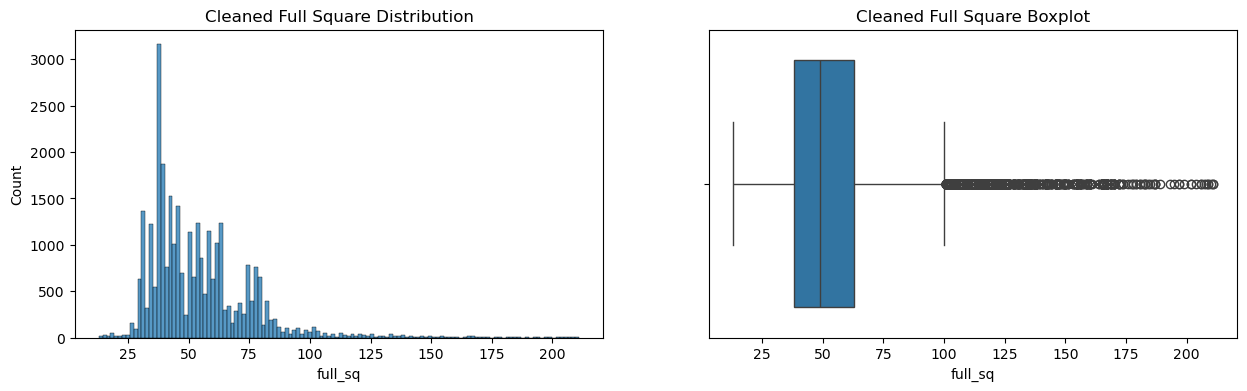

In [ ]:
# создаем функцию, которая примет датафрейм и признак, 
# а вернет датафрейм только с выбросами и датафйрем очищенный от выбросов 
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    # условием выбираем узнаем заданны ли при входе параметры
    if (left == 1.5) and (right == 1.5):
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        # фильтруем таблицу и осталяем только те ячейки данных которые
        # меньше числа lower_bound - нижняя граница Тьюки и
        # больше числа upper_bound - верхняя граница Тьюки
        outliers = data[(x < lower_bound) | (x > upper_bound)]
        cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
        return outliers, cleaned
    else:
        # получаем верхние т нтжние границы Тьюки,
        # если параметры left и right были заданы
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * left)
        upper_bound = quartile_3 + (iqr * right)
        # фильтруем таблицу и осталяем только те ячейки данных которые
        # меньше числа lower_bound - нижняя граница Тьюки и
        # больше числа upper_bound - верхняя граница Тьюки
        outliers = data[(x < lower_bound) | (x > upper_bound)]
        cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
        return outliers, cleaned  
            
# применим фнкцию и узнаем сколько записей в датафреймах
outliners, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
print(f'Число выбросов по методу Тьюки: {outliners.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
# утвержаем что данные пришли в очищенные и графики выглядят правдоподобными
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

# Задание 6.3

Давайте расширим правило трёх сигм, чтобы иметь возможность учитывать особенности данных. Добавьте в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3.

Результирующую функцию назовите outliers_z_score_mod().

Можете протестировать работу функции на DataFrame test_sber_data.csv. Проверять ваше решение мы будем, подавая на вход функции вместо data произвольный датафрейм.

In [26]:
# импортирую библиотеки
import pandas as pd
import numpy as np


# инициализирую функцию для нахождения выбросов по методу трех сигм
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    # если логонормальное распределение то лоарифмирууем и получаем нужный ряд
    if log_scale:
        x = np.log(data[feature] + 1) 
    else:
        x = data[feature]
    # подготавливаю прерменные для слздания фильтров
    mu = x.mean() 
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned


## Задание 6.4

Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

In [29]:
# ослабляю верхнюю границу по методу трех сигм
# инициализирую функцию для нахождения выбросов по методу трех сигм
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    # если логонормальное распределение то лоарифмирууем и получаем нужный ряд
    if log_scale:
        x = np.log(data[feature] + 1) 
    else:
        x = data[feature]
    # подготавливаю прерменные для слздания фильтров
    mu = x.mean() 
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned

# передаю в переменные ряд выбросов и очищенный ряд
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True \
    , left=3, right=3.5)
print(f'Результирующее количество выбросов по методу 3-сигм: {outliers.shape[0]\
    }')
print(f'Результирующее количество записей: {cleaned.shape[0]}')



Результирующее количество выбросов по методу 3-сигм: 0
Результирующее количество записей: 30471


## Задание 6.5

Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

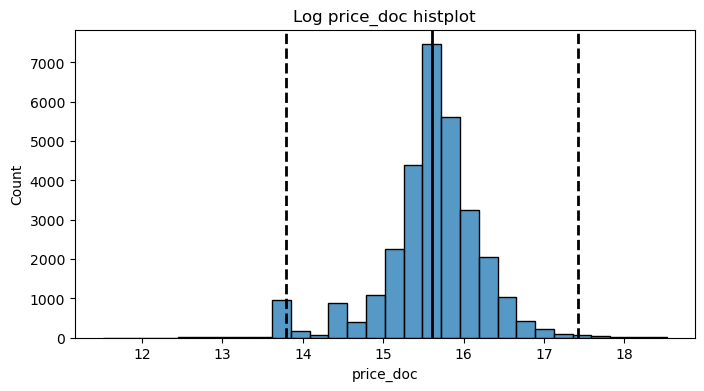

In [35]:
# ослабляю верхнюю границу по методу трех сигм
# инициализирую функцию для нахождения выбросов по методу трех сигм
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    # если логонормальное распределение то лоарифмирууем и получаем нужный ряд
    if log_scale:
        x = np.log(data[feature] + 1) 
    else:
        x = data[feature]
    # подготавливаю прерменные для слздания фильтров
    mu = x.mean() 
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return outliers, cleaned

# для того чтобы построить гистаграмму вкладываю в переменные необходимые данные
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=\
    True)
# на холсте будет нарисованна гистограмма
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# логорифмируем признак price_doc
price_doc_log = np.log(sber_data['price_doc'] + 1)
# визуализирую на холсте гистраграмму 
histplot = sns.histplot(data=price_doc_log, bins=30, ax=axes)
# чертим линию средних значений
histplot.axvline(price_doc_log.mean(), color='k', lw=2)
# отображаем верхнюю и нижнюю границу
histplot.axvline(price_doc_log.mean() + 3 * price_doc_log.std(), lw=2, ls='--'\
    , color='k')
histplot.axvline(price_doc_log.mean() - 3 * price_doc_log.std(), lw=2, ls='--'\
    , color='k')
histplot.set_title('Log price_doc histplot');

C Число наблюдений, не попавших в интервал слева, больше чем справа. 

## Задание 6.6

Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

In [38]:
# инициализирую функцию для того чтобы узнать количество выюросов 
# с учетом ослабдения границ

def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    pass

    return outliers, cleaned

# фрейм с выбросами и фрейм без выбросов помещаю в переменные
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', \
    log_scale=True, left=3.7, right=3.7)
print(f'Результирующее количество выбросов по методу 3-сигм: {outliers.shape[0]\
    }')
print(f'Результирующее количество записей: {cleaned.shape[0]}')



Результирующее количество выбросов по методу 3-сигм: 146
Результирующее количество записей: 30325


## Задание 6.7

Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [40]:
# создаем функцию, которая примет датафрейм и признак, 
# а вернет датафрейм только с выбросами и датафйрем очищенный от выбросов 
def outliers_iqr_mod(data, feature,log_scale=False, left=1.5, right=1.5):
    # логорифмируем без прибавления 1, потому что 0 в записях нет
    # проверяем условие вводимого аргумента
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    # условием выбираем узнаем заданны ли при входе параметры
    if (left == 1.5) and (right == 1.5):
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        # фильтруем таблицу и осталяем только те ячейки данных которые
        # меньше числа lower_bound - нижняя граница Тьюки и
        # больше числа upper_bound - верхняя граница Тьюки
        outliers = data[(x < lower_bound) | (x > upper_bound)]
        cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
        return outliers, cleaned
    else:
        # получаем верхние т нтжние границы Тьюки,
        # если параметры left и right были заданы
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * left)
        upper_bound = quartile_3 + (iqr * right)
        # фильтруем таблицу и осталяем только те ячейки данных которые
        # меньше числа lower_bound - нижняя граница Тьюки и
        # больше числа upper_bound - верхняя граница Тьюки
        outliers = data[(x < lower_bound) | (x > upper_bound)]
        cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
        return outliers, cleaned  
            
# применим фнкцию и узнаем сколько записей в датафреймах
outliners, cleaned = outliers_iqr_mod(sber_data, 'price_doc', \
    log_scale=True, left=3, right=3)
print(f'Число выбросов по методу Тьюки: {outliners.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
